In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [3]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/2970165590.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [4]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [5]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [6]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.164934,1.170861,1.114405,1.177631,1.165433,1.203663,1.192949,1.238514,1.162927,1.210419,...,1.236144,1.250755,1.185744,1.249170,1.234697,1.188749,-0.030465,0.043168,0.035846,0.583633
1,0.761002,0.820226,0.793080,0.791474,0.785159,0.803046,0.827114,0.801742,0.775767,0.771092,...,0.795013,0.787247,0.801204,0.756448,0.794514,0.785793,-0.032042,0.039219,0.033051,
2,0.823079,0.967688,0.799581,0.913651,0.896390,0.934685,0.910534,0.898608,0.880462,0.913077,...,0.971067,0.941099,0.930150,0.904849,0.952336,0.920711,-0.087022,0.098459,0.087705,
3,1.507663,1.778704,2.126593,1.806426,1.895007,2.001820,1.941885,1.931660,1.797074,1.729603,...,1.850710,1.685671,1.853992,1.976717,1.705203,1.926741,-0.448874,0.647669,0.448874,
4,0.733496,0.824053,0.950750,0.848254,0.803519,0.808495,0.829780,0.847463,0.836620,0.806773,...,0.828972,0.799507,0.826764,0.815297,0.833097,0.829192,-0.093848,0.100662,0.093848,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.819945,1.385600,1.343734,1.468456,1.377872,1.274532,1.346453,1.420346,1.297500,1.300754,...,1.382362,1.494405,1.359553,1.283516,1.274219,1.404348,-0.547090,0.551831,0.547090,
296,1.348967,43.690183,40.463003,46.242794,38.197444,59.061732,43.387854,3.192716,42.709328,46.766799,...,46.636182,42.321077,46.258821,49.267827,15.393293,44.163215,-40.992627,42.385124,40.992627,
297,0.774595,1.382308,1.407821,1.294560,1.383075,1.504185,1.474328,1.513723,1.417350,1.877143,...,1.468319,1.297281,1.398280,1.544068,1.511625,1.606153,-0.759481,1.215447,0.759481,
298,1.662084,26.164450,30.002253,26.918915,32.113133,36.240524,29.237371,29.391767,31.740855,29.331825,...,28.704826,27.882470,29.877222,30.707384,30.405142,27.931658,-27.891097,27.948442,27.891097,


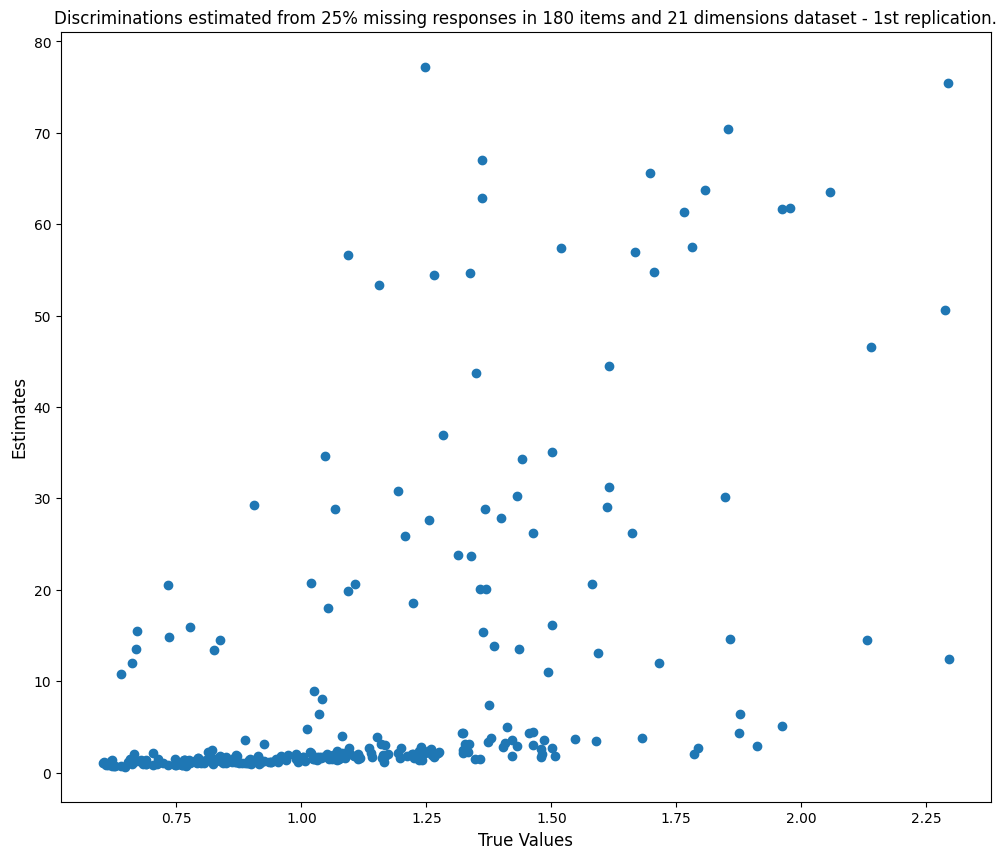

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 25% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [8]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [9]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/3949084561.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [10]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [11]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [12]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.516250,-0.667925,-0.705245,-0.710976,-0.637390,-0.707337,-0.662299,-0.642743,-0.683869,-0.735609,...,-0.674846,-0.643494,-0.715232,-0.691523,-0.659179,-0.693448,0.162031,0.166938,0.162031,0.812206
1,-0.403987,-0.520276,-0.559722,-0.521832,-0.504120,-0.538233,-0.510814,-0.489717,-0.491289,-0.543337,...,-0.492295,-0.453219,-0.557289,-0.542683,-0.488578,-0.523028,0.102833,0.106824,0.102833,
2,-1.797941,-2.250870,-2.211136,-2.243423,-2.275711,-2.304275,-2.116600,-2.244343,-2.368449,-2.267210,...,-2.188902,-2.236905,-2.508635,-2.327520,-2.236004,-2.240509,0.481173,0.486417,0.481173,
3,0.763532,3.762237,3.699132,3.422299,3.253275,4.371480,3.601330,3.218526,3.656794,3.829784,...,3.762546,3.873482,3.505140,3.657014,3.563344,3.703924,-2.918996,2.934380,2.918996,
4,-0.787187,-1.682351,-1.797583,-2.117845,-1.570638,-1.869657,-1.854526,-2.072465,-1.992419,-1.804326,...,-1.933526,-1.769714,-1.723655,-1.848100,-1.713387,-1.542802,1.127026,1.146216,1.127026,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.660764,1.269260,0.500194,0.297011,0.576525,0.151629,0.918908,1.102235,0.335266,0.614961,...,1.213485,1.153105,0.569383,0.051038,0.570163,0.833679,0.138721,0.399554,0.329012,
176,0.928390,0.635681,0.632073,0.646090,0.527530,0.604380,0.686911,0.521458,0.571418,0.548731,...,0.665967,0.654774,0.624136,0.510175,0.511119,0.616637,0.341944,0.351395,0.344315,
177,-2.073206,-2.132316,-2.131416,-2.117911,-2.106212,-2.132029,-2.125689,-2.118059,-2.130996,-2.173574,...,-2.131760,-2.101071,-2.154549,-2.170255,-2.143411,-2.128157,0.051248,0.055797,0.051674,
178,0.197686,0.198517,0.204300,0.212457,0.214917,0.208196,0.218981,0.194329,0.222468,0.186359,...,0.198990,0.182444,0.212371,0.212672,0.220777,0.214954,-0.006970,0.014964,0.011950,


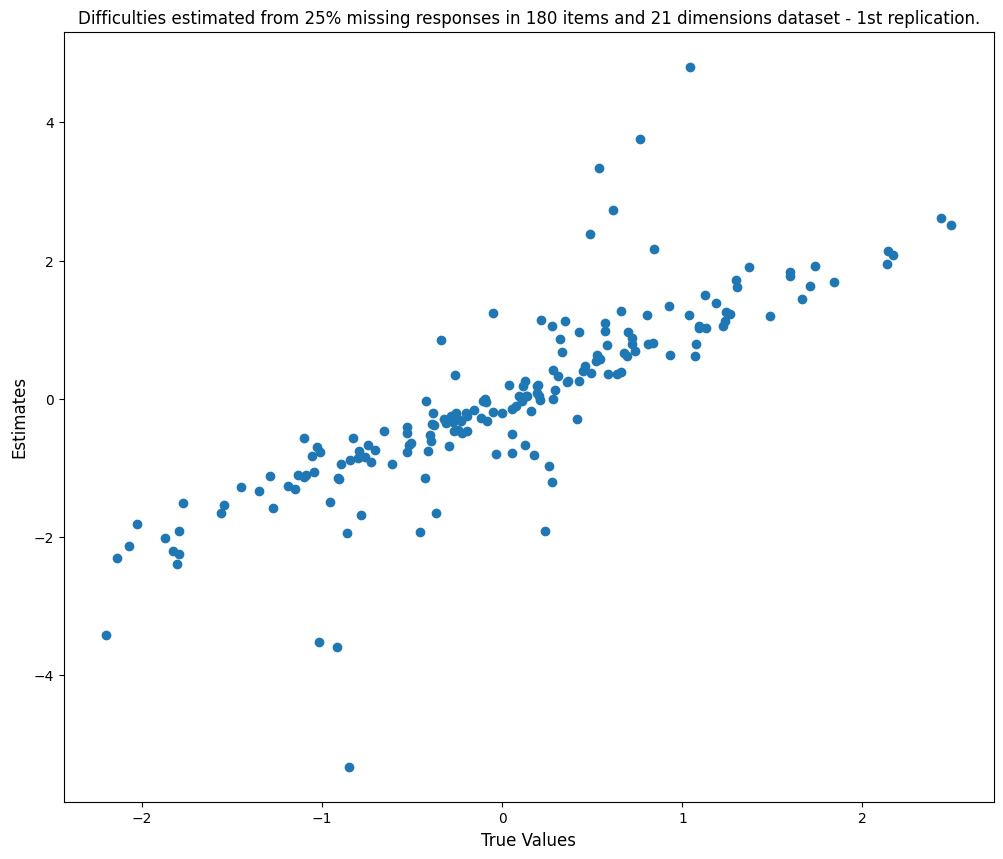

In [13]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 25% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [14]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [15]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [17]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/2283255080.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [18]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [19]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90828/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [20]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.255686,-2.127624,-1.861197,-1.953680,-2.155499,-1.787859,-2.130625,-2.066240,-2.082536,-1.972467,...,-1.795259,-2.760686,-1.764583,-2.114522,-2.209593,-2.143995,0.675631,0.732077,0.675631,0.67501
1,0.417691,-0.074805,0.055301,0.266470,0.187488,-0.448044,0.063650,0.014506,0.301322,0.008089,...,0.359619,-0.263939,0.135992,0.106888,0.251881,-0.377521,0.388559,0.440732,0.389619,
2,-0.218857,-0.357996,-0.326948,-0.397456,0.052754,-0.284165,-0.698699,-0.032721,-0.302475,-0.158373,...,0.041147,-0.302319,-0.403968,-0.577081,-0.031580,-0.108175,0.014116,0.261704,0.225587,
3,0.506261,-0.243263,0.408639,0.131734,-0.020827,0.119484,0.145867,0.432624,0.377773,0.165089,...,0.670032,-0.209488,0.570307,0.104711,-0.165643,0.341237,0.368228,0.477481,0.404638,
4,0.165964,0.136312,-0.324928,0.071261,0.198714,-0.059792,0.063513,0.008096,0.125085,-0.036422,...,-0.064739,0.138503,0.032716,0.152297,-0.152207,-0.056373,0.188161,0.282127,0.196722,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-1.058072,-0.367272,-0.631875,-0.709844,-0.513410,-0.764406,-0.836813,-0.525833,-0.661475,-0.526181,...,-0.451963,-0.611073,-0.298653,-1.497611,-0.525041,-1.581684,-0.325999,0.518545,0.463423,
167996,-0.292246,0.740465,0.731630,0.752643,0.024144,0.087447,0.208927,0.806324,-1.722900,1.089229,...,1.083299,0.655436,0.777782,0.054354,0.584005,0.653720,-0.862418,0.975280,0.926988,
167997,-1.132776,-1.048889,-1.596636,-1.496473,-0.828866,-1.250050,-0.749607,-1.075833,-0.923603,-0.736202,...,-1.548793,-1.012467,-1.270892,-1.255627,-0.983226,-0.877045,-0.034178,0.334085,0.282119,
167998,0.537725,-0.127628,0.441351,-0.136439,0.353622,0.315717,-0.085271,0.676016,-0.048733,0.189127,...,0.396056,-0.075446,-0.068585,-0.075659,-0.035303,-0.097903,0.494699,0.559711,0.517955,


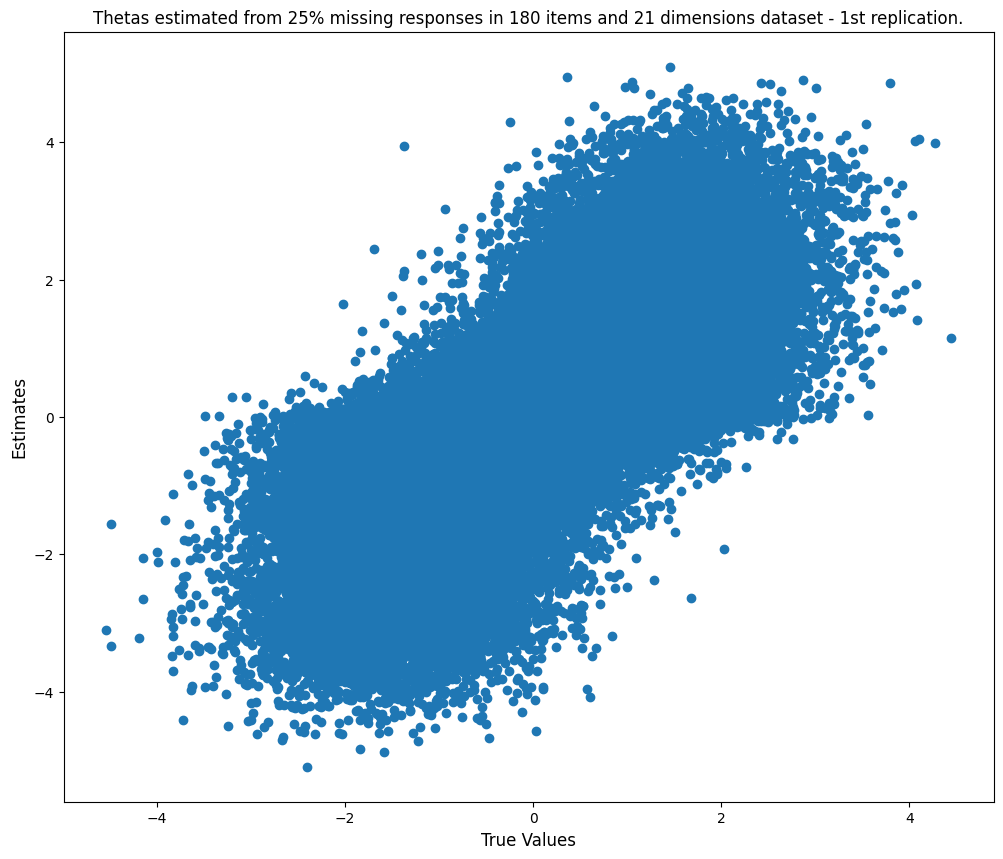

In [21]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 25% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [22]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)